In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1b: Build a logistic regression model

#### Using the dataset “student_data.csv,” write code to
#####(1) create a visualization of the data,

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Read in the data
df = pd.read_csv('/content/drive/MyDrive/UMBC/SEM_3/IS 733 Data Mining/Week 6/student_data.csv')

profile = pd.DataFrame(columns=['Feature', 'DataType', 'Non-Null Count', 'Unique Values'])

for col in df.columns:
    dtype = str(df[col].dtype)
    non_null = df[col].count()
    uniques = df[col].nunique()

    profile = profile.append({'Feature': col,
                              'DataType': dtype,
                              'Non-Null Count': non_null,
                              'Unique Values': uniques}, ignore_index=True)

print(profile)

          Feature DataType Non-Null Count Unique Values
0   Hours_Studied  float64            100           100
1  Review_Session    int64            100             2
2         Results    int64            100             2


####(2) fit a model using logistic regression,
####(3) output model coefficients and performance metrics such as accuracy and AUC and ROC

Model Coefficients:
Hours_Studied: 1.3649921479181393
Review_Session: 1.877337556038091
Intercept: -4.611824619845847
Accuracy: 0.93
AUC: 0.98


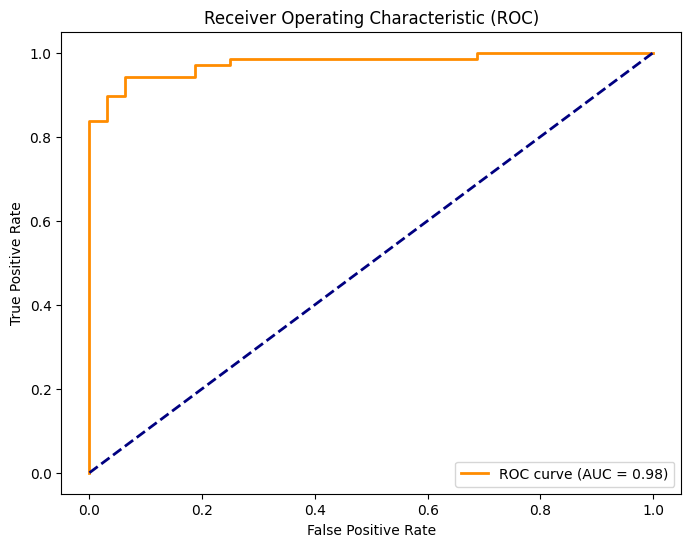

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc


# Assuming 'Hours_Studied', 'Review_Session' are your features, and 'Results' is the target
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Model coefficients
coefficients = model.coef_
intercept = model.intercept_

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate ROC and AUC
y_prob = model.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Output the results
print("Model Coefficients:")
for feature, coef in zip(X.columns, coefficients[0]):
    print(f"{feature}: {coef}")
print(f"Intercept: {intercept[0]}")
print(f"Accuracy: {accuracy:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In this code:

We load the dataset from 'student_data.csv' and select 'Hours_Studied' and 'Review_Session' as features and 'Results' as the target variable.

We create a logistic regression model, fit it to the dataset, and make predictions on the same dataset.

We calculate the model coefficients, accuracy, and ROC-AUC score.

We output the model coefficients and performance metrics.

We plot the ROC curve for visualization.

Keep in mind that training and testing on the same dataset can lead to overly optimistic performance metrics. In practice, you should split your data into training and testing sets for more realistic evaluations.

# Task2:
###Understanding and Prevent Overfitting in the context of SVM

In [4]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd


# Define the features (Hours_Studied and Review_Session) and target (Results)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# (1) Fit an SVM model with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# (2) Fit an SVM model with an RBF kernel and perform grid search for the best gamma parameter
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
svm_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate both models
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Output the results
print("SVM with Linear Kernel:")
print(f"Accuracy: {accuracy_linear:.2f}")

print("SVM with RBF Kernel:")
print(f"Best Parameters (C and gamma): {svm_rbf.best_params_}")
print(f"Accuracy: {accuracy_rbf:.2f}")


SVM with Linear Kernel:
Accuracy: 0.87
SVM with RBF Kernel:
Best Parameters (C and gamma): {'C': 1, 'gamma': 1}
Accuracy: 0.87


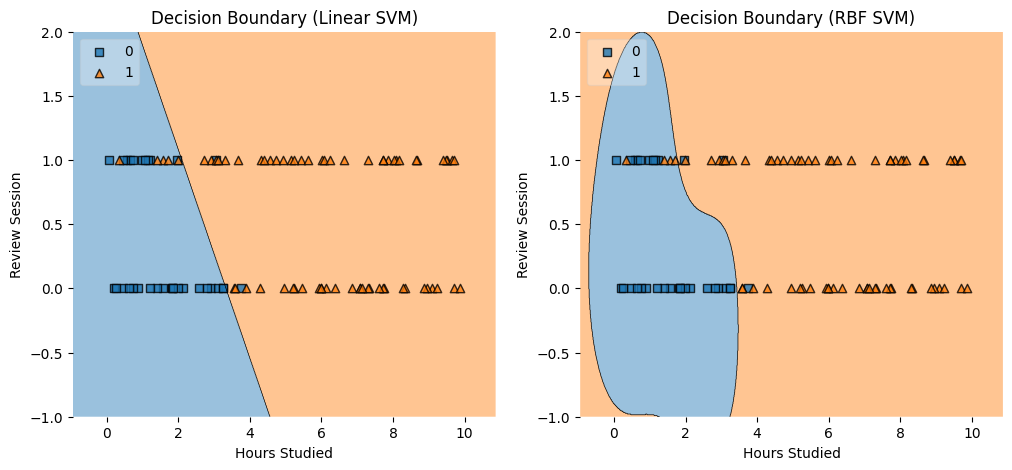

In [6]:
# Plot decision boundaries
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_regions(X.values, y.to_numpy(), clf=svm_linear, legend=2)
plt.title("Decision Boundary (Linear SVM)")
plt.xlabel("Hours Studied")
plt.ylabel("Review Session")

plt.subplot(1, 2, 2)
plot_decision_regions(X.values, y.to_numpy(), clf=svm_rbf, legend=2)
plt.title("Decision Boundary (RBF SVM)")
plt.xlabel("Hours Studied")
plt.ylabel("Review Session")

plt.show()
